ValueError: hist method requires numerical or datetime columns, nothing to plot.

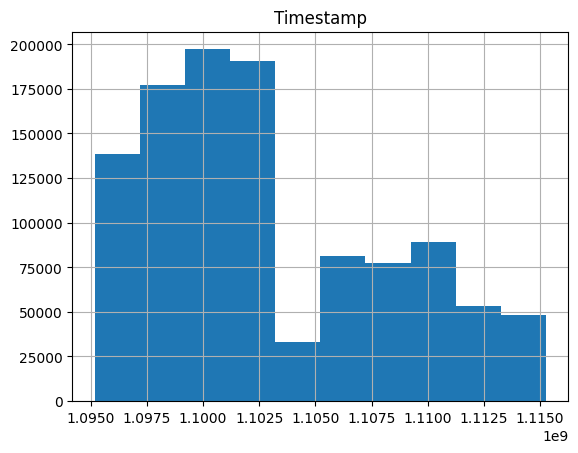

In [ ]:
import pandas as pd

df = pd.read_csv("data/reality-mining.csv")
df.hist("Timestamp")
df["T"] = df["Timestamp"].diff()


diffs = list(df["T"])
dt = 30 * 60  # 30 minutes

win_sizes = []
for i, val in enumerate(diffs):
    cumm = 0
    for j in range(i + 1, len(diffs)):
        cumm += diffs[j]
        if cumm > dt:
            win_sizes.append(j - i)
            break

pd.DataFrame([{"win_size": win_sizes}]).T.hist("win_size")

df.hist("T")

array([[<Axes: title={'center': 'win_size'}>]], dtype=object)

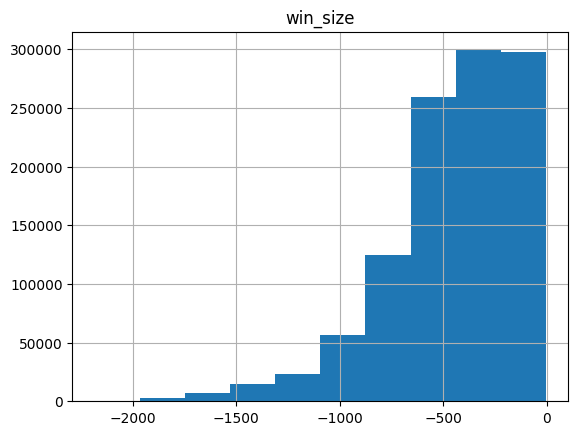

In [19]:
df = pd.DataFrame([{"win_size": winsize} for winsize in win_sizes])
df.hist("win_size")